In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression

from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Modelo de regressão Linear simples

## EXEMPLO 1

In [ ]:
boston = datasets.load_boston()

## Features

CRIM: Taxa de criminalidade per capita por cidade

ZN: Proporção de terrenos residenciais zoneados para lotes acima de 25.000 sq.ft.

INDUS: Proporção de hectares de negócios não varejistas por cidade.

CHAS: variável dummy Charles River (1 se o trato limita o rio; 0 caso contrário)

NOX: concentração de óxidos nítricos (partes por 10 milhões)

RM: Número médio de quartos por habitação

IDADE: Proporção de unidades ocupadas pelos proprietários construídas antes de 1940

DIS: Distâncias ponderadas para cinco centros de emprego em Boston

RAD: Índice de acessibilidade às rodovias radiais

IMPOSTO: Taxa de imposto de propriedade de valor total por US$ 10.000

PTRATIO: Relação aluno-professor por cidade

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df = df.drop(columns=['B'])
df['HousePrice'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
X = df[["CRIM",	"ZN",	"INDUS",	"CHAS",	"NOX",	"RM",	"AGE",	"DIS",	"RAD",	"TAX",	"PTRATIO",	"LSTAT"]]
y = df["HousePrice"]

### Ajuste comum

In [ ]:
# Ajustando o modelo
boston_model = LinearRegression()
boston_model.fit(X,y)

boston_r2 = boston_model.score(X,y)
print('R^2:',boston_r2)

R^2: 0.7343070437613075


In [ ]:
boston_model.coef_

array([-1.21388618e-01,  4.69634633e-02,  1.34676947e-02,  2.83999338e+00,
       -1.87580220e+01,  3.65811904e+00,  3.61071055e-03, -1.49075365e+00,
        2.89404521e-01, -1.26819813e-02, -9.37532900e-01, -5.52019101e-01])

In [ ]:
boston_model.intercept_

41.61727017595457

### Ajuste completo

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())        

                            OLS Regression Results                            
Dep. Variable:             HousePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 01 Sep 2022   Prob (F-statistic):          2.23e-133
Time:                        00:10:28   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Devemos selecionar modelos com menores valores de AIC (ou BIC).

Adj. R-squared: penaliza modelos com muitas features

## multicolinearidade

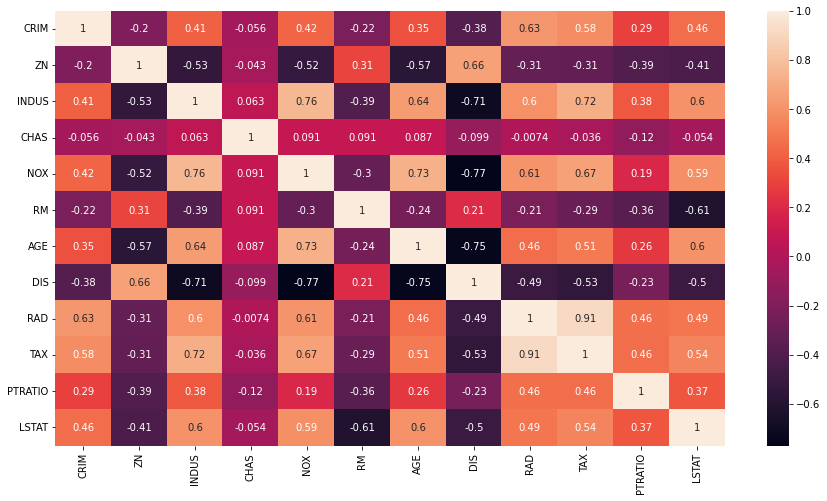

In [ ]:
sns.heatmap(X.corr(), annot=True)
plt.gcf().set_size_inches(15, 8)

In [ ]:
X = df[["CRIM",	"ZN",	"INDUS",	"CHAS",	"NOX",	"RM",	"AGE",	"DIS",	"RAD",	"TAX",	"PTRATIO",	"LSTAT"]]
y = df["HousePrice"]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())   

                            OLS Regression Results                            
Dep. Variable:             HousePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 01 Sep 2022   Prob (F-statistic):          2.23e-133
Time:                        00:24:55   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
boston_model = LinearRegression()
boston_model.fit(X,y)

LinearRegression()

## VIF
O VIF próximo a 1 não há multicolinearidade, se for maior que 1, as preditoras podem estar moderadamente correlacionadas. VIF acima de 5 pode indica
alta correlação. 

In [ ]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

CRIM        2.047768
ZN          1.659353
INDUS       8.898085
CHAS        1.111855
AGE        13.861052
RAD         4.817111
PTRATIO    12.497046
LSTAT       8.246377
dtype: float64

In [ ]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [ ]:
def linear_assumption(model, features, label):
  
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


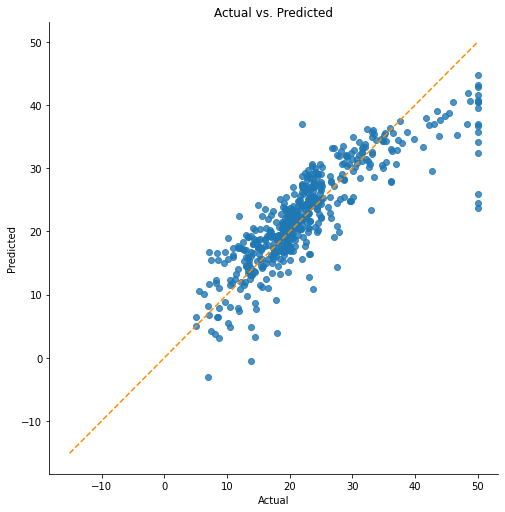

In [ ]:
linear_assumption(boston_model, X, y)

## Normalidade

In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 7.215372657378478e-22
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


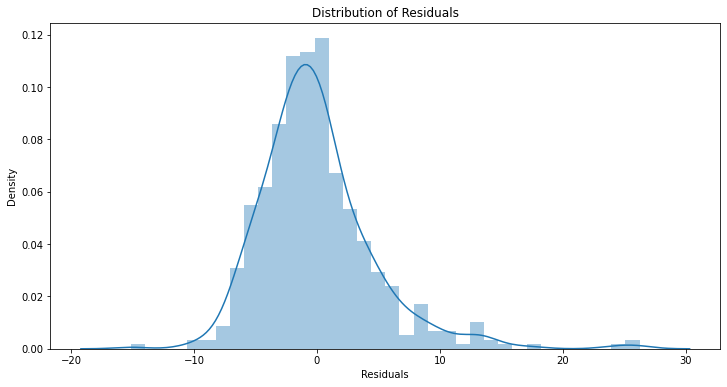


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
normal_errors_assumption(boston_model, X, y)


## homocedasticidade 

In [ ]:
def homoscedasticity_assumption(model, features, label):
  
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


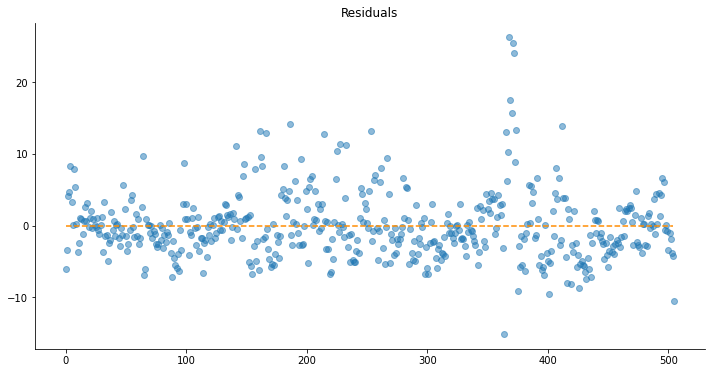

In [ ]:
homoscedasticity_assumption(boston_model, X, y)